<a href="https://colab.research.google.com/github/nathanielgtg/Facial-Expressions-Recognition-Using-Convolutional-Neural-Network/blob/NNN-Net/BM_32x32_RMSprop_lr(0_001).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab-Notebook

/content/drive/My Drive/Colab-Notebook


In [ ]:
ls

CK+48/


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Reshape
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from keras import backend as K
from imutils import paths
from keras.layers import Dropout
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("CK+48")
data = []
labels = []


[INFO] loading images...


In [ ]:
for imagePath in imagePaths:
  image = Image.open(imagePath)
  image = np.array(image.resize((32, 32))) / 255.0
  pixel = np.expand_dims(image, axis=0)
  data.append(pixel)
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

['surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'su

In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(1315, 1, 32, 32)
(439, 1, 32, 32)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.fit_transform(testY)
print(testY)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]


In [ ]:
#MODEL 1
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Reshape((32,32,1), input_shape=(None,32,32,1)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(7))
model.add(Activation("softmax"))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 activation (Activation)     (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 13, 13, 32)        0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.95):
      print("\nReached 90.0% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, batch_size=20) 

Epoch 1/40
66/66 [==============================] - 3s 39ms/step - loss: 1.9459 - accuracy: 0.1551 - val_loss: 1.9440 - val_accuracy: 0.1185
Epoch 2/40
66/66 [==============================] - 2s 36ms/step - loss: 1.8874 - accuracy: 0.2601 - val_loss: 1.7832 - val_accuracy: 0.3121
Epoch 3/40
66/66 [==============================] - 2s 36ms/step - loss: 1.6027 - accuracy: 0.4297 - val_loss: 1.4565 - val_accuracy: 0.3736
Epoch 4/40
66/66 [==============================] - 2s 36ms/step - loss: 1.2299 - accuracy: 0.5924 - val_loss: 1.2369 - val_accuracy: 0.5239
Epoch 5/40
66/66 [==============================] - 2s 37ms/step - loss: 0.9637 - accuracy: 0.6844 - val_loss: 0.8846 - val_accuracy: 0.7244
Epoch 6/40
66/66 [==============================] - 2s 37ms/step - loss: 0.7772 - accuracy: 0.7407 - val_loss: 0.7923 - val_accuracy: 0.7540
Epoch 7/40
66/66 [==============================] - 2s 37ms/step - loss: 0.6318 - accuracy: 0.7871 - val_loss: 0.6388 - val_accuracy: 0.7995
Epoch 8/40
66

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


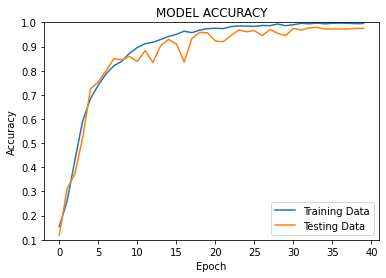

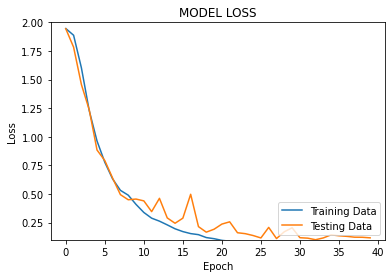

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='lower right')
X = np.linspace(0, 100, 100)
plt.ylim(.1, 1)
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='lower right')
X = np.linspace(0, 100, 100)
plt.ylim(.1, 2)
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
target_names=['anger','contempt','disgust','fear','happy','sadness','surprise']
predictions = model.predict(testX, batch_size=32)
print(predictions)
print(testY)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=target_names))

[INFO] evaluating network...
[[4.72906940e-08 9.98731077e-01 5.89880474e-05 ... 1.16053479e-05
  9.22147159e-09 1.18002528e-03]
 [4.05107403e-06 9.99991536e-01 1.63393395e-06 ... 7.83513372e-07
  1.36968876e-12 1.90620221e-06]
 [1.05497304e-04 9.99878764e-01 2.19309571e-10 ... 1.44095779e-07
  4.81942880e-06 8.13841837e-07]
 ...
 [8.40169450e-05 5.87064771e-17 1.49705262e-10 ... 1.90772043e-21
  9.99915957e-01 9.51594381e-13]
 [6.50780194e-08 6.30742030e-12 6.89500768e-09 ... 3.37407766e-16
  9.99867320e-01 1.21014404e-04]
 [2.40360976e-07 9.99474823e-01 6.80654821e-09 ... 1.46904213e-07
  1.46259838e-10 5.24306728e-04]]
[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]
              precision    recall  f1-score   support

       anger       0.98      0.96      0.97        52
    contempt       0.91      1.00      0.95        52
     disgust       1.00      0.97      0.99        77
        fear       0.96      0.89 

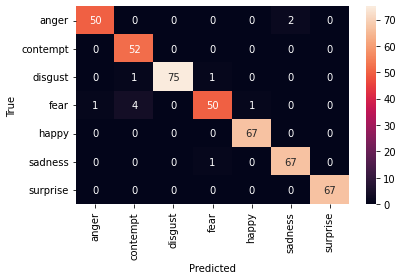

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
x_axis_labels = ['anger','contempt','disgust','fear','happy','sadness','surprise']
y_axis_labels = ['anger','contempt','disgust','fear','happy','sadness','surprise']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()